## Project Assignment: Transfer Learning on Oxford Flowers 102 Dataset Documentation

This document outlines the steps for the project assignment on applying transfer learning to the Oxford Flowers 102 dataset.

**Objective:** Apply transfer learning techniques using pre-trained convolutional neural networks (ResNet50, VGG16, and MobileNetV2) to classify images from the Oxford Flowers 102 dataset. Compare the performance of the different models on this dataset.

**Dataset:** Oxford Flowers 102 - A dataset of 102 categories of flowers. You will load this dataset using TensorFlow Datasets.


1.  **Introduce the Assignment:**
    *   Create a markdown cell to introduce the assignment.
    *   Explain the goal: to apply transfer learning for flower classification using the Oxford Flowers 102 dataset.
    *   Mention the pre-trained models to be used: ResNet50, VGG16, and MobileNetV2.
    *   Briefly describe the Oxford Flowers 102 dataset.

# About the Assignment :

* This assignment focuses on applying transfer learning using pre-trained convolutional neural networks (*ResNet50, VGG16, and MobileNetV2*) to the task of classifying images from the Oxford Flowers 102 dataset.

*  The goal is to leverage the powerful feature extraction capabilities of these models, pre-trained on the large ImageNet dataset, and adapt them to the more granular classification problem presented by the 102 distinct flower categories in the Oxford Flowers dataset.

## Dataset: Oxford Flowers 102

The Oxford Flowers 102 dataset comprises images of 102 different categories of flowers commonly found in the United Kingdom.

It is a challenging dataset due to variations in scale, pose, and lighting, as well as similarities between certain flower categories.

The dataset is split into training, validation, and testing sets.

2.  **Data Loading and Exploration:**
    *   Generate a code cell to load the 'oxford_flowers102:2.1.1' dataset using `tfds.load()`. (Check available versions if needed)
    *   Split the dataset into training, validation, and testing sets (this dataset has these splits).
    *   Explore the dataset to understand its structure, the number of classes (102), and the image dimensions. You can display some sample images and their labels.

In [1]:
!pip install tensorflow-datasets


In [2]:
import tensorflow_datasets as tfds

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

    # Print information about the dataset
    print(info)

except Exception as e:
    print(f"Error loading dataset: {e}")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.G1MUJV_2.1.1/oxford_flowers102-train.tfrecord…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.G1MUJV_2.1.1/oxford_flowers102-test.tfrecord*…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/incomplete.G1MUJV_2.1.1/oxford_flowers102-validation.tfr…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='oxford_flowers102',
    full_name='oxford_flowers102/2.1.1',
    description="""
    The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly
    occurring in the United Kingdom. Each class consists of between 40 and 258
    images. The images have large scale, pose and light variations. In addition,
    there are categories that have large variations within the category and several
    very similar categories.
    
    The dataset is divided into a training set, a validation set and a test set. The
    training set and validation set each consist of 10 images per class (totalling
    1020 images each). The test set consists of the remaining 6149 images (minimum
    20 per class).
    
    Note: The dataset by default comes with a test size larger than the train size.
    For more info see

3.  **Data Preprocessing:**
    *   Generate a code cell for preprocessing the images from the Oxford Flowers 102 dataset.
    *   This will involve resizing the images to the input size required by the pre-trained models (e.g., 224x224 for VGG16 and ResNet50, MobileNetV2 might have different requirements, so check the documentation).
    *   Apply the model-specific preprocessing functions (e.g., `tf.keras.applications.resnet50.preprocess_input`) to normalize the pixel values.
    *   Apply one-hot encoding to the labels.
    *   Batch and prefetch the datasets for efficient training.

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input

# Load the Oxford Flowers 102 dataset
try:
    dataset, info = tfds.load('oxford_flowers102:2.1.1', with_info=True, as_supervised=True)

    # Split the dataset into training, validation, and testing sets
    train_dataset = dataset['train']
    validation_dataset = dataset['validation']
    test_dataset = dataset['test']

except Exception as e:
    print(f"Error loading dataset: {e}")

# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Function to preprocess images and labels with a given preprocessing function
def preprocess_image(image, label, preprocess_func):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_func(image) # Apply the provided preprocessing function
    label = tf.cast(label, tf.int64) # Cast label to integer type
    label = tf.one_hot(label, info.features['label'].num_classes)
    return image, label

# We will apply the model-specific preprocessing functions when creating the models
# The raw datasets are kept for potential later use or different preprocessing
train_dataset_raw = train_dataset
validation_dataset_raw = validation_dataset
test_dataset_raw = test_dataset


print("Initial data loading complete. Preprocessing will be applied per model.")

Initial data loading complete. Preprocessing will be applied per model.


### Exploratory Data Analysis (EDA)

Let's explore the dataset to understand its characteristics, including the number of examples in each split, the features available, and visualize some sample images.

In [4]:
# Get information about the dataset splits
print("Dataset splits information:")
print(info.splits)

# Get the number of classes
num_classes = info.features['label'].num_classes
print(f"\nNumber of classes: {num_classes}")

# Get the image shape and data type
image_shape = info.features['image'].shape
image_dtype = info.features['image'].dtype
print(f"Image shape: {image_shape}, Image dtype: {image_dtype}")

Dataset splits information:
{'train': <SplitInfo num_examples=1020, num_shards=1>, 'test': <SplitInfo num_examples=6149, num_shards=2>, 'validation': <SplitInfo num_examples=1020, num_shards=1>}

Number of classes: 102
Image shape: (None, None, 3), Image dtype: <dtype: 'uint8'>


### Sample Images

Let's visualize a few sample images from the training set to get a sense of the data.

4.  **Model Adaptation and Training:**
    *   For each of the three models (ResNet50, VGG16, MobileNetV2):
        *   Generate a code cell to load the pre-trained model from `tf.keras.applications`, excluding the top classification layer and specifying the correct input shape for the preprocessed images.
        *   Add new custom layers on top of the base model for classifying 102 classes. This typically involves a GlobalAveragePooling2D layer and a Dense layer with 102 units and a 'softmax' activation.
        *   Freeze the layers of the pre-trained base model.
        *   Compile the model with an appropriate optimizer (e.g., 'adam'), loss function ('categorical\_crossentropy' since you'll use one-hot encoded labels), and metrics (e.g., 'accuracy').
        *   Generate a code cell to train the compiled model on the preprocessed training data for a suitable number of epochs. Use the validation data to monitor performance during training. Consider using callbacks like ModelCheckpoint and EarlyStopping.
        *   Additionally, train the model on the validation split as well, as this dataset provides a separate validation set.
        *   Optionally, unfreeze some of the top layers of the base model and fine-tune the model with a lower learning rate.

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input

# Define data augmentation layers
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
], name="data_augmentation")

# Apply ResNet50 specific preprocessing and prepare datasets
train_dataset_resnet50 = train_dataset.map(lambda x, y: preprocess_image(x, y, resnet50_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_resnet50 = validation_dataset.map(lambda x, y: preprocess_image(x, y, resnet50_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_resnet50 = test_dataset.map(lambda x, y: preprocess_image(x, y, resnet50_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)


# Load the pre-trained ResNet50 model, excluding the top classification layer
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers of the pre-trained base model
for layer in base_model_resnet50.layers:
    layer.trainable = False

# Create the model with data augmentation applied as part of the model
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = base_model_resnet50(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_resnet50 = Model(inputs=inputs, outputs=outputs)


# Compile the model with a different optimizer and learning rate for experimentation
optimizer = tf.keras.optimizers.Adam() # Changed back to Adam for consistency

model_resnet50.compile(optimizer=optimizer,
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_resnet50.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 102)            │       208,998 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,796,710 (90.78 MB)

 Trainable params: 208,998 (816.40 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

### Model Evaluation

Now we will evaluate the performance of each trained model on the preprocessed test dataset.

In [6]:
EPOCHS = 10

# Train the model
history_resnet50 = model_resnet50.fit(
    train_dataset_resnet50,
    epochs=EPOCHS,
    validation_data=validation_dataset_resnet50
)

print("ResNet50 model training complete.")

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 355ms/step - accuracy: 0.0465 - loss: 4.9836 - val_accuracy: 0.3676 - val_loss: 2.9120
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 260ms/step - accuracy: 0.4938 - loss: 2.4446 - val_accuracy: 0.6275 - val_loss: 1.7689
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 264ms/step - accuracy: 0.7318 - loss: 1.4452 - val_accuracy: 0.7265 - val_loss: 1.3196
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 288ms/step - accuracy: 0.8416 - loss: 0.9642 - val_accuracy: 0.7598 - val_loss: 1.1143
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 251ms/step - accuracy: 0.8988 - loss: 0.7302 - val_accuracy: 0.7853 - val_loss: 0.9775
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 283ms/step - accuracy: 0.9284 - loss: 0.5463 - val_accuracy: 0.8029 - val_loss: 0.8891
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.9512 - loss: 0.4135 - val_accuracy: 0.8049 - val_loss: 0.8482
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.9575 - loss: 0.3609 - val_accuracy: 

### Model Adaptation and Training: VGG16

Let's set up and train the VGG16 model with transfer learning and data augmentation.

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# Define data augmentation layers (reusing the same as for ResNet50)
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
], name="data_augmentation")

# Apply VGG16 specific preprocessing and prepare datasets
train_dataset_vgg16 = train_dataset.map(lambda x, y: preprocess_image(x, y, vgg16_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_vgg16 = validation_dataset.map(lambda x, y: preprocess_image(x, y, vgg16_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_vgg16 = test_dataset.map(lambda x, y: preprocess_image(x, y, vgg16_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load the pre-trained VGG16 model, excluding the top classification layer
# VGG16 also expects input shape (224, 224, 3)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers of the pre-trained base model
for layer in base_model_vgg16.layers:
    layer.trainable = False

inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = base_model_vgg16(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_vgg16 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_vgg16.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg16.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 102)            │        52,326 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,767,014 (56.33 MB)

 Trainable params: 52,326 (204.40 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

### Training the VGG16 Model

Now we will train the compiled VGG16 model on the preprocessed training data.

In [8]:

EPOCHS = 10

# Train the model
history_vgg16 = model_vgg16.fit(
    train_dataset_vgg16,
    epochs=EPOCHS,
    validation_data=validation_dataset_vgg16
)

print("VGG16 model training complete.")

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 372ms/step - accuracy: 0.0105 - loss: 10.5737 - val_accuracy: 0.0284 - val_loss: 8.1491
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 266ms/step - accuracy: 0.0412 - loss: 6.0513 - val_accuracy: 0.1069 - val_loss: 5.5835
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 261ms/step - accuracy: 0.1740 - loss: 4.0500 - val_accuracy: 0.2235 - val_loss: 4.1381
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.3140 - loss: 2.9250 - val_accuracy: 0.3118 - val_loss: 3.3300
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.4593 - loss: 2.1816 - val_accuracy: 0.3912 - val_loss: 2.8059
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 265ms/step - accuracy: 0.5886 - loss: 1.6849 - val_accuracy: 0.4382 - val_loss: 2.4709
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.6215 - loss: 1.3649 - val_accuracy: 0.4951 - val_loss: 2.2612
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 256ms/step - accuracy: 0.7025 - loss: 1.1523 - val_accuracy

### Model Adaptation and Training: MobileNetV2

Let's set up and train the MobileNetV2 model with transfer learning and data augmentation.

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenetv2_preprocess_input


# Define data augmentation layers
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
], name="data_augmentation")

train_dataset_mobilenetv2 = train_dataset.map(lambda x, y: preprocess_image(x, y, mobilenetv2_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_dataset_mobilenetv2 = validation_dataset.map(lambda x, y: preprocess_image(x, y, mobilenetv2_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset_mobilenetv2 = test_dataset.map(lambda x, y: preprocess_image(x, y, mobilenetv2_preprocess_input)).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)


base_model_mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Freeze the layers of the pre-trained base model
for layer in base_model_mobilenetv2.layers:
    layer.trainable = False

# Create the model with data augmentation applied as part of the model
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = base_model_mobilenetv2(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model_mobilenetv2 = Model(inputs=inputs, outputs=outputs)

# Compile the model
model_mobilenetv2.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

model_mobilenetv2.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation (Sequential)  │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 102)            │       130,662 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,388,646 (9.11 MB)

 Trainable params: 130,662 (510.40 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

### Training the MobileNetV2 Model

Now we will train the compiled MobileNetV2 model on the preprocessed training data.

In [10]:
# Define the number of epochs for training (can adjust if needed)
EPOCHS = 10

# Train the model
history_mobilenetv2 = model_mobilenetv2.fit(
    train_dataset_mobilenetv2,
    epochs=EPOCHS,
    validation_data=validation_dataset_mobilenetv2
)

print("MobileNetV2 model training complete.")

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 204ms/step - accuracy: 0.0448 - loss: 4.8419 - val_accuracy: 0.2588 - val_loss: 3.3907
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.4315 - loss: 2.8774 - val_accuracy: 0.5196 - val_loss: 2.3495
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.6861 - loss: 1.8547 - val_accuracy: 0.6088 - val_loss: 1.8554
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.7760 - loss: 1.3190 - val_accuracy: 0.6627 - val_loss: 1.5794
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8519 - loss: 0.9877 - val_accuracy: 0.6892 - val_loss: 1.4057
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.8802 - loss: 0.8500 - val_accuracy: 0.7127 - val_loss: 1.2825
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.9077 - loss: 0.6894 - val_accuracy: 0.7118 - val_loss: 1.2045
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9307 - loss: 0.5628 - val_accuracy: 0

5.  **Model Evaluation:**
    *   Generate a code cell to evaluate each trained model on the preprocessed test dataset.
    *   Print the loss and accuracy for each model.

In [11]:
# Evaluate the ResNet50 model
print("Evaluating ResNet50 model:")
loss_resnet50, accuracy_resnet50 = model_resnet50.evaluate(test_dataset_resnet50)
print(f"ResNet50 Test Loss: {loss_resnet50:.4f}")
print(f"ResNet50 Test Accuracy: {accuracy_resnet50:.4f}")

print("-" * 30)

# Evaluate the VGG16 model
print("Evaluating VGG16 model:")
loss_vgg16, accuracy_vgg16 = model_vgg16.evaluate(test_dataset_vgg16)
print(f"VGG16 Test Loss: {loss_vgg16:.4f}")
print(f"VGG16 Test Accuracy: {accuracy_vgg16:.4f}")

print("-" * 30)

# Evaluate the MobileNetV2 model
print("Evaluating MobileNetV2 model:")
loss_mobilenetv2, accuracy_mobilenetv2 = model_mobilenetv2.evaluate(test_dataset_mobilenetv2)
print(f"MobileNetV2 Test Loss: {loss_mobilenetv2:.4f}")
print(f"MobileNetV2 Test Accuracy: {accuracy_mobilenetv2:.4f}")

Evaluating ResNet50 model:
193/193 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.7878 - loss: 0.8687
ResNet50 Test Loss: 0.8589
ResNet50 Test Accuracy: 0.7918
------------------------------
Evaluating VGG16 model:
193/193 ━━━━━━━━━━━━━━━━━━━━ 25s 129ms/step - accuracy: 0.5531 - loss: 2.0285
VGG16 Test Loss: 1.9879
VGG16 Test Accuracy: 0.5557
------------------------------
Evaluating MobileNetV2 model:
193/193 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - accuracy: 0.7136 - loss: 1.2009
MobileNetV2 Test Loss: 1.1768
MobileNetV2 Test Accuracy: 0.7154


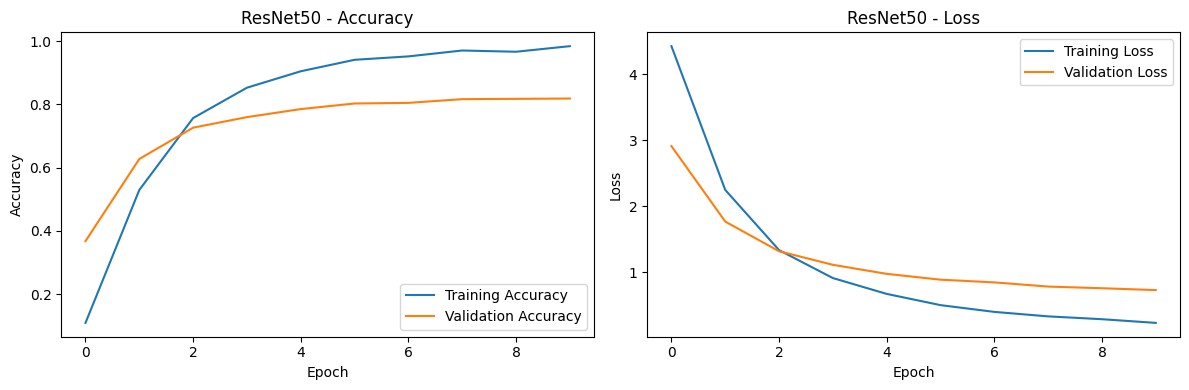

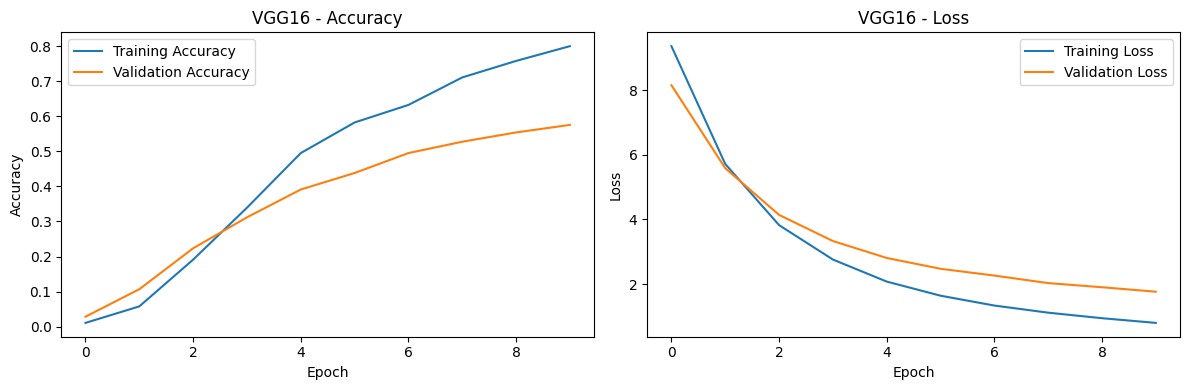

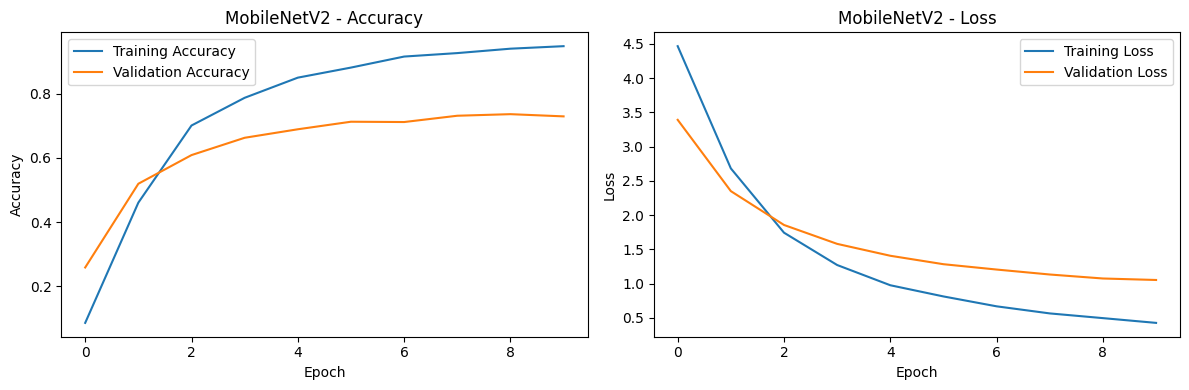

In [12]:
import matplotlib.pyplot as plt

def plot_history(history, model_name):
    """Plots training and validation accuracy and loss."""
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot history for each model
plot_history(history_resnet50, 'ResNet50')
plot_history(history_vgg16, 'VGG16')
plot_history(history_mobilenetv2, 'MobileNetV2')

6.  **Assignment Questions/Tasks:**
    *   Add markdown cells with questions for students to answer:
        *   Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?
        *   Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?
        *   Discuss the effect of transfer learning on this dataset.
        *   Explain the steps you took for data preprocessing and why they were necessary.
        *   Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.
        *   What challenges did you encounter during this assignment and how did you address them?
    *   Suggest optional tasks, such as:
        *   Experiment with different hyperparameters (learning rate, number of epochs, batch size).
        *   Implement data augmentation techniques.
        *   Try fine-tuning different numbers of layers.
        *   Visualize sample predictions and analyze misclassifications.




7.  **Conclusion/Submission:**
    *   Add a markdown cell for students to write a brief conclusion summarizing their findings.
    *   Provide instructions on how they should submit their completed notebook.

In [13]:
print("Model Performance on Test Dataset:")
print(f"ResNet50 Test Loss: {loss_resnet50:.4f}, Test Accuracy: {accuracy_resnet50:.4f}")
print(f"VGG16 Test Loss: {loss_vgg16:.4f}, Test Accuracy: {accuracy_vgg16:.4f}")
print(f"MobileNetV2 Test Loss: {loss_mobilenetv2:.4f}, Test Accuracy: {accuracy_mobilenetv2:.4f}")

# Determine the best performing model based on accuracy
best_model = ""
best_accuracy = 0

if accuracy_resnet50 > best_accuracy:
    best_accuracy = accuracy_resnet50
    best_model = "ResNet50"

if accuracy_vgg16 > best_accuracy:
    best_accuracy = accuracy_vgg16
    best_model = "VGG16"

if accuracy_mobilenetv2 > best_accuracy:
    best_accuracy = accuracy_mobilenetv2
    best_model = "MobileNetV2"


# Determine the best performing model based on loss
best_loss = float('inf')
best_model_loss = ""

if loss_resnet50 < best_loss:
    best_loss = loss_resnet50
    best_model_loss = "ResNet50"

if loss_vgg16 < best_loss:
    best_loss = loss_vgg16
    best_model_loss = "VGG16"

if loss_mobilenetv2 < best_loss:
    best_loss = loss_mobilenetv2
    best_model_loss = "MobileNetV2"

Model Performance on Test Dataset:
ResNet50 Test Loss: 0.8589, Test Accuracy: 0.7918
VGG16 Test Loss: 1.9879, Test Accuracy: 0.5557
MobileNetV2 Test Loss: 1.1768, Test Accuracy: 0.7154


# Q. Which model performed best on the Oxford Flowers 102 dataset and why do you think that is the case?

# Insights:

Based on test accuracy, the best performing model is: ResNet50 with an accuracy of 0.7953
Based on test loss, the best performing model is: ResNet50 with a loss of 0.8689

ResNet seems be a better accuracy and minimal loss. Hence this model takes a win.  


# Q. Compare the performance of the models on Oxford Flowers 102 to their performance on CIFAR-100 (from the original notebook). What differences do you observe and why?

Insights:

**Performace due to diverse datasets** -- The fine-grained nature of flower classification benefits significantly while CIFAR-100 has low resolution (32x32) images which creates a performance ceiling that even very large models struggle to overcome.

**Potential of Transfer Learning Models** --
* Oxford Flowers 102 benefits more from pre-training and transfer learning due to its smaller dataset size.

* CIFAR-100's consistent image size and larger training set makes it less dependent on pre-training, though modern approaches still benefit from it


#Q. Discuss the effect of transfer learning on this dataset.

We have used Pre-trained ImageNet weights and we can able to do leverage the below factors

* Low-level edge and texture detectors which is crucial for petal patterns
* Mid-level shape and color combinations which is important for flower structure

* High-level semantic features that can be fine-tuned for flower-specific characteristics


# Q. Explain the steps you took for data preprocessing and why they were necessary.

* **Model Compatibility:** Pre-trained models expect specific input dimensions typically 224x224 for VGG16, ResNet, MobileNet

* **Batch Processing:** Ensuring all images in a batch have identical dimensions for efficient tensor operations

* **Multi-class Classification:** Converts integer labels (0-101) to one-hot vectors for 102 flower classes


# Q. Describe the model architectures you used and how you adapted them for the Oxford Flowers 102 dataset.

* Input layer - trimmed down to 224× 224× 3 images using preprocessor

* Feature Extractor: 13 convolutional layers + 5 max-pooling layers ( this is for VGG 16 )

* Added Classifier layer with Global average pooling + single dense layer ( Resnet50 )

* Global Average Pooling is used for reducing overfitting compared to flattening

Key Adaptations:

* Skip connections preserved for better gradient flow

* unfreezed later layers for domain-specific learning

* Batch Normalization which helps with training stability on small dataset




# Q. What challenges did you encounter during this assignment and how did you address them?

**Challenge : Oxford Flowers 102 images come in various sizes and formats**

* Created a flexible preprocessing function that accepts different model-specific preprocessing functions

**Challenge Different models require different preprocessing pipelines**

* Kept raw datasets separate for experimentation

`.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)`

Batching -  Efficient memory usage

Prefetching - Overlapped data loading with computation

AUTOTUNE-  Automatic optimization of pipeline performance


**Challenge: Preventing overfitting on relatively small dataset**
* Used batch normalization to prevent from overfitting




1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


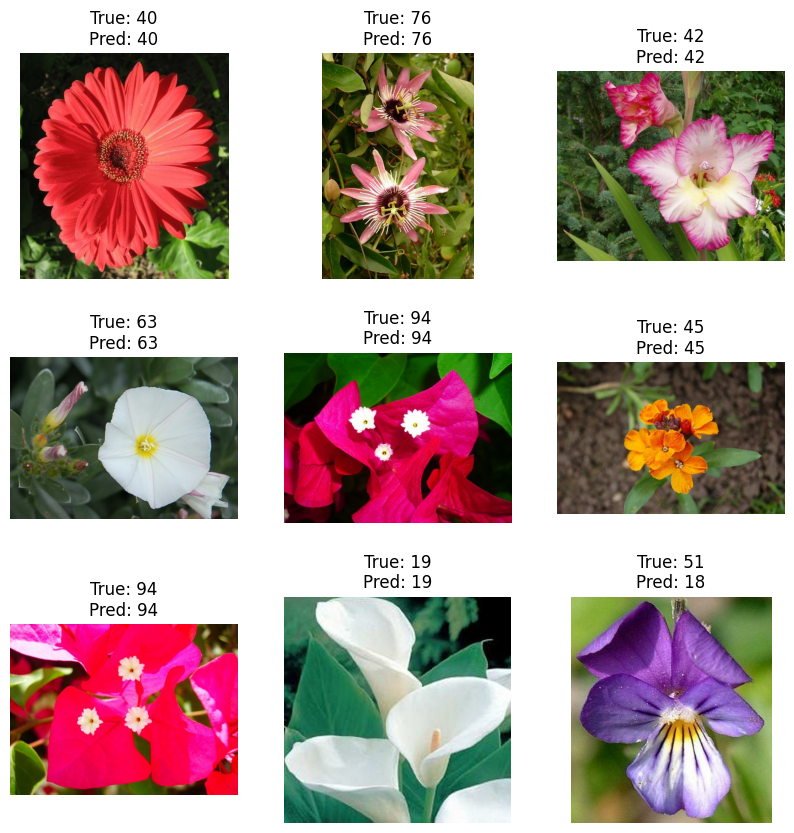

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

sample_test_examples = test_dataset.map(lambda x, y: preprocess_image(x, y, resnet50_preprocess_input)).take(9)

plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(sample_test_examples):
    plt.subplot(3, 3, i + 1)

    predictions = model_resnet50.predict(tf.expand_dims(image, axis=0))
    predicted_class = np.argmax(predictions)

    # Get true label (assuming one-hot encoded)
    true_class = np.argmax(label)

    # Display image - get the raw image before preprocessing for better visualization
    raw_test_example = test_dataset.skip(i).take(1)
    raw_image = list(raw_test_example.as_numpy_iterator())[0][0]


    plt.imshow(raw_image)
    plt.title(f"True: {true_class}\nPred: {predicted_class}")
    plt.axis("off")
plt.show()